<a href="https://www.kaggle.com/code/rinichristy/logistic-regression-algorithm?scriptVersionId=96776826" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Behind the Scenes of Logistic Regression Algorithm**

## **Table of Contents**

  * [Logistic Regression: Introduction](#Introduction)<br>
  * [Mathematical Intepretation of Logistic Regression Algorithm](#Mathematics)<br>
  * [Cost Function](#CostFunction)<br>
  * [Gradient Descent](#Gradient)<br>
  * [Implementation of Logistic Regression Algorithm](#implementation)<br>
  * [Decision Boundary Display](#Decision)<br>
  * [Dealing with the problem of overfitting: Regularization](#Regularization)
    


### **Import Libraries & Primary modules**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## **Logistic Regression: Introduction**<a name = 'Introduction'></a> 

While Linear Regression is suited for estimating continuous values, it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, some sort of guidance is required on what would be the most probable class for that data point. For this, Logistic Regression is used.

In simple terms a linear regression is expressed by the following equation: 
$$ Y = b_0 + b_0X$$
<br>
With Sigmoid function applied---->
$$P = \frac {1}{1 + e^{(-y)}} $$
<br><br>
$$ln(\frac{p}{1-p}) = b_0 + b_0X$$
<br><br>


**Linear regression** finds a function that relates a continuous dependent variable, **y**, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<br>


**Logistic Regression** is a variation of Linear Regression, useful when the observed dependent variable, **y**, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables. 

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma(\theta^TX) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma(\theta^TX) = \frac{e^(\theta^TX)}{1+e^(\theta^TX)} 
$$

In this equation, $(\theta^TX)$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](https://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">

Image credit: [IBM](https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png)

The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma(\theta^TX)$, in such a way that the model best predicts the class of each case.


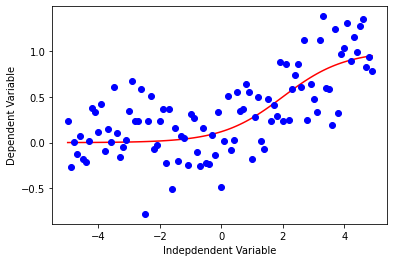

In [2]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1/(1+np.power(2.712, -(X-2)))
Y_noise = 0.25 * np.random.normal(size=X.size) 
Ydata = Y + Y_noise

plt.plot(X,Y, '-r') 
plt.plot(X, Ydata,  'bo')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

If we use Linear Regression in this problem, we will get a best-fit line like this:

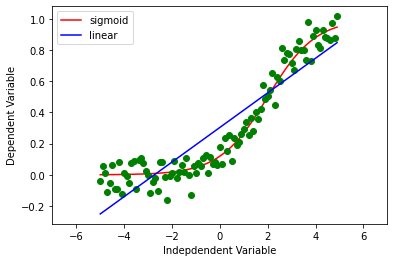

In [3]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1/(1+np.power(2.712, -(X-2)))
Y_noise = 0.07 * np.random.normal(size=X.size) 
Ydata = Y + Y_noise

plt.plot(X,Y, '-r', label = 'sigmoid') 
plt.plot(X, Ydata,  'go')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
x= X.reshape(len(X),1)
y = 1/(1+np.power(3, -(x-2)))
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
Yhat = lr.predict(x)
plt.plot(x, Yhat,  'b', label = 'linear')
plt.xlim([-7,7])
plt.legend()
plt.show()

Applying the Linear regression, obtained a line (blue one) with equation Yhat = ßX + b.

If this line is extended, values greater than 1 and less than 0 are obtained, which do not make much sense in a classification problem. It will make a model interpretation a challenge. If we needed to predict a continuous variable as an output, then this model could be helpful. But here we need to classify our data as Y = 0 or Y = 1. That is where ***Logistic Regression*** comes in for rescue.

## **Mathematical Intepretation of Logistic Regression Algorithm**<a  name = 'Mathematics'></a>
Logistic regression hypothesis is defined as:
$$ Ŷ  = h_0(X) = \sigma(Z)$$

where h(θ) is the probability estimation or the hypothesis function. Function $\sigma$ is the sigmoid function. The sigmoid function for parameter z can be represented as follows:

$$Ŷ =\frac{1}{1+ e^{-z}}$$

$$ 
\sigma(Z) = \frac{1}{1+ e^{-z}} 
$$

$$ Z = \theta^TX$$

$$ 
\sigma(\theta^TX) = \frac{1}{1+ e^{-\theta^TX}} 
$$

Note that the sigmoid function always lies in the range of 0 to 1. This gives us a perfect output representation of probabilities too.

Here θ stands for the estimated parameter vector and X is the vector of variables considered.

$X = X_0, X_1 ... X_n$    <- n Features and X0=1

$θ = θ_0, θ_1 ... θ_n $   <- Parameters to be estimated


The following plot shows us what the sigmoid function looks like. The function y = \sigma(z), shown here, maps any real number to the (0, 1) interval, making it useful for transforming an arbitrary-valued function into a function better suited for classification. When $\sigma(z)$ > 0.5 y can be classified as belong to class 1 and those below 0.5 can be included in class 0.

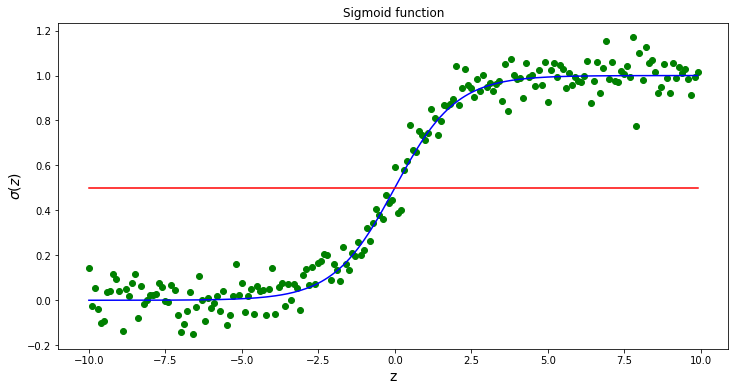

In [4]:
x = np.arange(-10,10, 0.1)
y = 1/(1+np.exp(-x))
Y_noise = 0.07 * np.random.normal(size=x.size) 
Ydata = y + Y_noise
y1 = 0.5 + np.zeros(len(x))
plt.figure(figsize= (12,6))
plt.plot(x, Ydata,  'go')
plt.plot(x,y, c = 'Blue')
plt.plot(x,y1, c = 'Red')
plt.xlabel('z', fontsize = 14)
plt.ylabel('$\sigma(z)$',fontsize = 14)
plt.title('Sigmoid function');

Whenever the hypothesis outputs that the probability of y being 1 is greater than or equal to 0.5, this means that if there is more likely to be y equals 1 than y equals 0, then let's predict y equals 1. And otherwise, if the estimated probability of y being 1 is less than 0.5, then let's predict y equals 0. 

If we look at this plot of the sigmoid function, we'll notice that the sigmoid function, $\sigma(z)$ is greater than or equal to 0.5 whenever z is greater than or equal to zero. So is in this half of the figure that $\sigma$ takes on values that are 0.5 and higher. This notch here, that's 0.5, and so when z is positive, $\sigma(z)$, the sigmoid function is greater than or equal to 0.5. Since the hypothesis for logistic regression is $$h_0(X) = \sigma(\theta^TX)$$, this is therefore going to be greater than or equal to 0.5, whenever $\theta^TX$ is greater than or equal to 0. Because here $\theta^TX$ takes the role of z as,$$Z = \theta^TX$$, so what is shown here is that a hypothesis is going to predict y equals 1 whenever $\theta^TX$ is greater than or equal to 0.

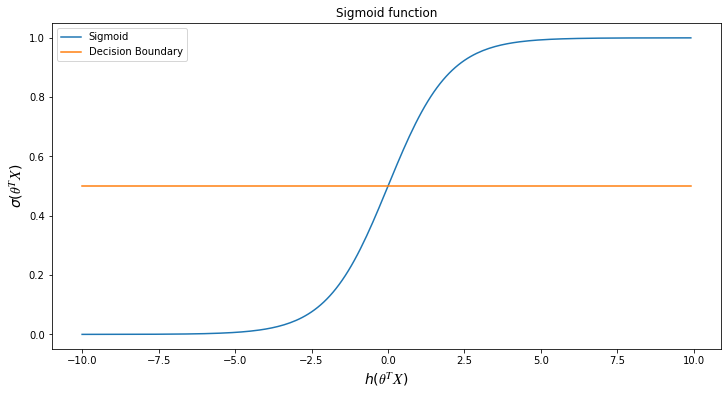

In [5]:
x = np.arange(-10,10, 0.1)
y = 1/(1+np.exp(-x))
y1 = 0.5 + np.zeros(len(x))
plt.figure(figsize= (12,6))
plt.plot(x,y, label = 'Sigmoid')
plt.plot(x,y1, label = 'Decision Boundary')
plt.xlabel('$h(𝜃^𝑇𝑋)$', fontsize = 14)
plt.ylabel('$\sigma(𝜃^𝑇𝑋)$', fontsize = 14)
plt.legend()
plt.title('Sigmoid function');

Let's now consider the other case of when a hypothesis will predict y is equal to 0. Well, by similar argument, h(x) is going to be less than 0.5 whenever g(z) is less than 0.5 because the range of values of z that cause g(z) to take on values less than 0.5, well, that's when z is negative. So when g(z) is less than 0.5, a hypothesis will predict that y is equal to 0. And by similar argument to what we had earlier, $$h_0(X) = \sigma(\theta^TX)$$ and so we'll predict y equals 0 whenever this quantity $\theta^TX$ is less than 0. 

To summarize this, to predict whether y=1 or y=0 depending on whether the estimated probability is greater than or equal to 0.5, or whether less than 0.5, then that's the same as saying that 

we predict $ y=1$  whenever $ \theta^TX >= 0$, 

And we'll predict $y = 0 $ whenever $\theta^TX < 0$ 

## **Cost Function**<a name = 'CostFunction'></a>

Our task now is to choose the best parameters θs in the equation above, in order to minimize errors. The procedure is similar to that for linear regression: define a cost function and try to find the best possible values of each θ that minimizes the cost function output. The gradient descent algorithm is used for this error minimization, whose task is to adjust the parameters θs to minimize the cost function output until it finds the lowest minimum point.


Mean Squared Error is the most commonly used Cost function. **However, keep this in mind that the Mean Squared Error as a cost function used in Linear Regression is not used in Logistic Regression**

The original cost function J(θ) used in linear regression is not going to work here with logistic regression with sigmoid transformation, which is non-linear. This is because, the linear regression's cost function will only generate a non-convex function instead of typical convex plot that we get in linear regression. With this wierdly-shaped graph with a number of local minima it will never achieve its minimum global point, instaed get stuck in some local minima creating complications to find global minima.

Second reason is in classification problems, where we have target values like 0/1, So when Y is either 0 or 1, a continuous Ŷ value generated after Sigmoid transformation,  $(Ŷ-Y)^2$ will always be in between 0-1 which can make it very difficult to keep track of the errors and it is difficult to store high precision floating numbers.

To achieve a convex graph which converges to a global minimum we have to apply a better cost function for logistic regression. The cost function used in Logistic Regression is termed as **Log Loss**. Mathematically  Log Loss can be interpretated as the negative average of the log of corrected predicted probabilities for each instance.

### **Log Loss: A new Cost Function for Logistic Regression**

The multivariable form of the hypothesis function accommodating these multiple features is as follows:
<br>
$
h_\theta (x) = \theta_0 + \theta_1  x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n
$

<br></br>
$
Parameters : \theta_0, \theta_1,  \theta_2,  \theta_3,   \cdots  \theta_n 
$
<br></br>
The accuracy of the hypothesis function can be measured by using a cost function. This takes an average difference of all the results of the hypothesis with inputs from x's and the actual output y's. 


The cost function used in linear regression is represented by the following equation:
<br>
$$
J(\theta_0, \theta_1) = \frac {1}{2m}{\sum_{i=1} ^{m} (\hat{y_i} -y_i)^2} = \frac {1}{2m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)^2}
$$
<br></br>

Rearrange the equation in a slightly different way by just moving the 1/2 inside the summation part:
<br>
$$
J(\theta_0, \theta_1) = \frac {1}{m}{\sum_{i=1} ^{m}\frac {1}{2} (\hat{y_i} -y_i)^2} = \frac {1}{m}{\sum_{i=1} ^{m}\frac {1}{2} (h_\theta (x_i) -y_i)^2}
$$
<br></br>

Now define a new function by separating the part inside summation as follows 
<br></br>
$$Cost(h_\theta (x_i),  y_i) = \frac {1}{2} (h_\theta (x_i) -y_i)^2$$

<br></br>
Substituting this in the first equation:
<br></br>

$$
J(\theta) = \frac {1}{m}{\sum_{i=1} ^{m}(Cost(h_\theta (x_i),  y_i)}
$$

<br></br>
Upto this point both linear regression and logistic regression cost function look similar. However, the linear regression's cost function cannot be used in logistic regression problems.So we have to find a different Cost function, while the summation part stays the same.

### **Log Loss: Logistic regression cost function illustration**
For logistic regression, the Cost function is defined as:

$$
Log\ loss = \frac {1}{m}{\sum_{i=1} ^{m}(log Pi)}
$$

if y = 1  $$Cost(h_\theta (x_i),  y_i) = -log h_\theta (x)$$ 

and 

if y = 0  $$Cost(h_\theta (x_i),  y_i) = -log (1- h_\theta (x))$$ 

This is the cost the algorithm pays if it predicts a value hθ(x) while the actual cost label turns out to be y. By using this function the convexity to the function the gradient descent algorithm has to process is achieved. 

This can be illustrated by the following example. Generate a random dataset with two features and two classes. Our objective is to discover the proper values of θ for the two features.

In [6]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
#X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1, n_clusters_per_class = 1)
# summarize the dataset
print(X.shape, y.shape)

(100, 2) (100,)


In [7]:
X[0:5]

array([[-1.04948638,  0.8786438 ],
       [ 0.8780991 ,  0.89551051],
       [ 0.95928819,  1.03967316],
       [-1.18013412,  1.12062155],
       [-0.90731836,  1.06040861]])

In [8]:
df = pd.DataFrame(X)
df.insert(2, 'y', y)
df.head()

,0,1,y
0,-1.049486,0.878644,1
1,0.878099,0.895511,0
2,0.959288,1.039673,0
3,-1.180134,1.120622,1
4,-0.907318,1.060409,1


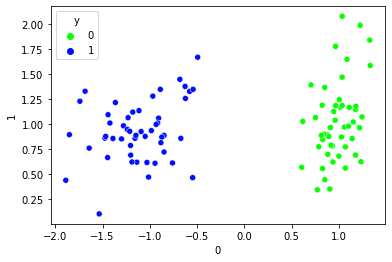

In [9]:
sns.scatterplot(x = 0, y = 1, data = df, hue = df['y'], palette = 'hsv');

Applying log

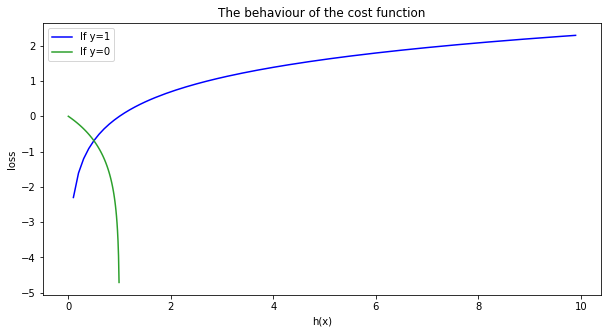

In [10]:
y = np.log(x)
fig = plt.figure(figsize=(10,5))
plt.plot(x,y, color="Blue", label="If y=1")
x = np.arange(0.001, 1, 0.01)
y = np.log(1-x)
plt.plot(x,y, color="C2", label="If y=0")
plt.legend()
plt.xlabel("h(x)")
plt.ylabel("loss")
plt.title('The behaviour of the cost function');

As you can see these log values are negative. To deal with the negative sign, we take the negative average of these values, to maintain a common convention that lower loss scores are better.
Applying negative log,

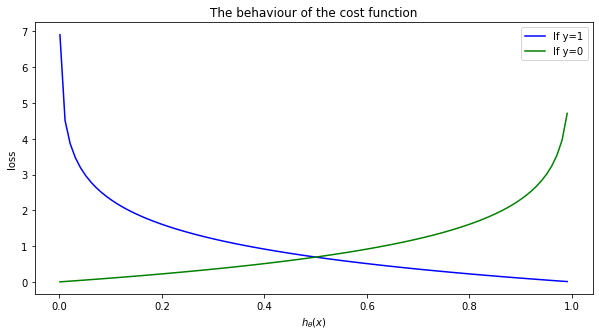

In [11]:
y = -np.log(x)
fig = plt.figure(figsize=(10,5))
plt.plot(x,y, color="Blue", label="If y=1")
x = np.arange(0.001, 1, 0.01)
y = -np.log(1-x)
plt.plot(x,y, color="Green", label="If y=0")
plt.legend()
plt.xlabel("$h_θ(x)$")
plt.ylabel("loss")
plt.title('The behaviour of the cost function');

In case y=1 (blue curve), the output (i.e. the cost to pay) approaches to 0 as $h_θ(x)$ approaches to 1. Conversely, the cost to pay grows to infinity as $h_θ(x)$ approaches to 0. 

Similarly, the same logic applies when y=0, depicted above. Bigger penalties that goes to infinity when the label is y=0 but the algorithm predicts $h_θ(x)$=1.

In short, there are three steps to find Log Loss:
1. Find predicted probabilities using Sigmoid function.
2. Take a log of predicted probabilities obtained.
3. Take the negative average of the values obtained in the 2nd step.

If we summarize all the above steps, We can make it more compact into a one-line expression:-

$$Cost(h_\theta (x_i),  y_i) = -ylog (h_\theta (x)) - (1-y)log (1- h_\theta (x))$$

Substituting this in the original logistic regression the entire cost function (log loss) equation can be wriiten as follows:

$$
Log\ loss = \frac {1}{m}{\sum_{i=1} ^{m}(-ylog (h_\theta (x)) - (1-y)log (1- h_\theta (x)))}
$$
Moving the minus sign outside 
$$
Log\ loss = -\frac {1}{m}{\sum_{i=1} ^{m}(ylog (h_\theta (x)) + (1-y)log (1- h_\theta (x)))}
$$

## **Gradient Descent**<a name = 'Gradient'></a>
Now, the hypothesis function and the cost function are ready. The next step is gradient descent to find the best values for θs parameters that minimizes the cost function. The procedure is almost similar to that for linear regression, except that the cost function is log loss here.

Gradient descent is an optimization algorithm used to obtain the optimized network weights and bias values. It works by iteratively trying to minimize the cost function by calculating the gradient of cost function and moving in the negative direction until the local/ global minimum is achieved. The size of the steps taken are called the learning rate $\alpha$. If the learning rate increases, the area covered in the search space will increase and so we might reach global minimum faster. However, we can overshoot the target. For small learning rates, training will take much longer to reach optimized bias & weight values. 


* **Goal:** 
<ul>
minimize $ J(\theta)$ that will output a set of parameters θ, the best ones with the least error possible. Once done,the model with the new θs in the hypothesis function will be suitable to make predictions on new set of testing examples with their features x.
    
$$ Ŷ  = h_0(X) = \sigma(Z) = \frac{1}{1+ e^{-z}} = \frac{1}{1+ e^{-\theta^TX}} $$

Where Ŷ or hθ(x) is the probability prediction output that y=1.
    

Gradient Descent works as follows: <br>
1. Pick random values for weights and bias ($\theta_i$) and substitute. 
2. Calculate the gradient (derivative) of the Loss function, $\frac{d(loss)}{d\theta_i}$
3. Calculate the step size (how much are we going to update the parameters?)

    Step size = learning rate * gradient = $\alpha *  \frac{d(loss)}{d\theta_i}$

4. Update the parameters simultaneously and repeat

    New bias = old bias– step size

    New weight = old weight – step size

    $\theta_new = \theta_old = \alpha *  \frac{d(loss)}{d\theta_i}$


**Mathematical representation of Gradient Descent**
    
Cost function is represented by the following equation.
<br>
$
J(\theta) = \frac {1}{2m}{\sum_{i=1} ^{m} (error)^2} = \frac {1}{2m}{\sum_{i=1} ^{m} (\hat{y_i} -y_i)^2} = \frac {1}{2m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)^2}
$
<br>
  
To minimize the cost function the gradient descent function is run on each parameter, repeat each step until convergence.

* Gradient $\frac{d}{d\theta_i} J(\theta_i)$ represents that when θ is moved + or − a unit, how much J will + or − correspondingly
* Since the goal is to decrease J, θ is updated  with partial gradient (partial unit of θ change) controlled by learning rate $(\alpha)$.
* Update all parameters at the same time (simultaneous updation) as given by the following equation , so that the cost function keeps same for all parameters in single round.
<br>
$\theta_1:=\theta_1-\alpha \frac{d}{d\theta_1} J(\theta_1)$<br></br>
$\theta_2:=\theta_2-\alpha \frac{d}{d\theta_2} J(\theta_2)$<br></br>
$\theta_j:=\theta_j-\alpha \frac{d}{d\theta_j} J(\theta_j)$

As in the linear regression counterpart, update all θj simultaneously. if there are n features, all n+1 the parameter vector θ⃗ =[θ0,θ1,⋯θn], have to be updated simultaneously on each iteration, repeating until convergence.

It is time to compute the derivative of the cost function in order to update the parameterss. The derivative part can be worked out using calculus to get:

$\frac{d}{d\theta_j}J(\theta_j) = \frac {1}{m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)x_j}$

Substitutung in the theta parameter the loop above,

$\theta_j:=\theta_j-\frac {\alpha}{m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)x_j}$

Notice that this algorithm is identical to the one used in linear regression. The only change is in the definition of the hypothesis $h_\theta(x)$: 
* for linear regression: $h_\theta(x)=\theta^⊤x$, 
* whereas for logistic regression $h_\theta(x)= \frac{1}{1+ e^{-\theta^TX}} $.

## **Implementation of Logistic Regression Algorithm**<a name = 'implementation'></a>
We have a training set of m training examples and as usual, each of our examples is represented by a (n +1) dimensional theta and as usual we have $X_o$ equals one, so as to make (m x (n+1)) dimensional X.
Here θ stands for the estimated parameter vector and X is the vector of variables considered.

$X = x_0, x_1 ... x_n$    <- n Features and X0=1 creating (m x (n+1)) matrix

$θ = θ_0, θ_1 ... θ_n $   <- Parameters to be estimated and is a ((n+1) x 1) sized vector.


In [12]:
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
log = LogisticRegression()
log.fit(X,y)
print(log.intercept_)
print(log.coef_)

[-0.13931403]
[[-3.36656909  0.12308678]]


In [13]:
X[0:5]

array([[-1.04948638,  0.8786438 ],
       [ 0.8780991 ,  0.89551051],
       [ 0.95928819,  1.03967316],
       [-1.18013412,  1.12062155],
       [-0.90731836,  1.06040861]])

In [14]:
# Adding 1 to each rows of first column to make X0 =1) 
X = np.concatenate([np.ones((len(X), 1)), X], axis=1)
X[0:5]

array([[ 1.        , -1.04948638,  0.8786438 ],
       [ 1.        ,  0.8780991 ,  0.89551051],
       [ 1.        ,  0.95928819,  1.03967316],
       [ 1.        , -1.18013412,  1.12062155],
       [ 1.        , -0.90731836,  1.06040861]])

### **Define hypothesis function**
The first line of code will compute a vector 'h' containing all of the hypothesis values - one for each training example (i.e. for each row of X).
The hypothesis (also called the prediction) is simply the product of X and theta. Since X is size (m x n) and theta is size (n x 1), arrange the order of operators so the result is size (m x 1). Vectorization with np.dot() is to be used to obtain the matrix or vector multiplication which is far more efficient than using a for loop. 

In [15]:
def h(theta, Xi):
    return 1/(1 + np.exp(-1*np.dot(Xi, theta)))

The next is to implement this sigmoid cost function in two steps. The first step will compute the difference between the hypothesis and y - that's the error for each training example. After this, in the second step each of those error terms is squared.  

In [16]:
def sigmoid_cost_function(theta, X, y):
    m = len(X)
    return 1/(2*m) * sum((h(theta, X) - y)**2)

### **Applying the function**
We can obtain our p(y=1) estimate using the following function call. Note that the intercept value should be used as the first element of theta parameter and the rest in order. Add an additional 1 for the feature vector which corresponds to the $X_0$ =1.

In [17]:
# h(theta, Xi)
h([-0.13931403, -3.36656909,  0.12308678],[1, 0.95928819,  1.03967316])

0.037656931098779683

hθ(x) will give us the probability that our output is 1. If hθ(x)=0.8 it gives us a probability of 80% that our output is 1. 

Here, hθ(x)=0.03 gives us a probability of 3.8% that our output is 1. In other words, there is a probability of 96.2% chance that the point belongs to the class 0. The probability that the prediction is 0 is just the complement of our probability that it is 1 (e.g. if probability that it is 1 is 30%, then the probability that it is 0 is 70%.
$$hθ(x)=P(y=1|x;θ)=1−P(y=0|x;θ)$$
$$P(y=0|x;θ)+P(y=1|x;θ)=1$$

Predit y = 1 if hθ(x) is >=0.

Substituting for theta values obtained,

-0.13931403 -3.36656909* X[0] + 0.12308678 * X[1] >=0

-3.36656909* X[0] + 0.12308678 * X[1] >= 0.13931403

In [18]:
#Substituting for X1 and X2
-3.36656909* 0.95928819 + 0.12308678 * 1.03967316

-3.1015399473392224

Since the -3.10 is not greater than 1.04 y= 1 cannot be predicted. So the answer is y=0. This is confirmed by sklearn algorithm as follows:

In [19]:
print(log.predict_proba([[0.95928819,  1.03967316]]))
print(log.predict([[0.95928819,  1.03967316]]))

[[0.96234307 0.03765693]]
[0]


## **Decision Boundary Display**<a name = 'Decision'></a>
Finally, plot decision boundary in two different ways as follows. Decision Boundary can be visualized by dense sampling via meshgrid. The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values. More information on meshgrid can be obtained from [here](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy/49439331). 

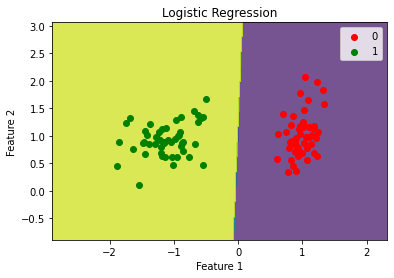

In [20]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, log.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, c = ListedColormap(('yellow', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression')
plt.legend()
plt.show()


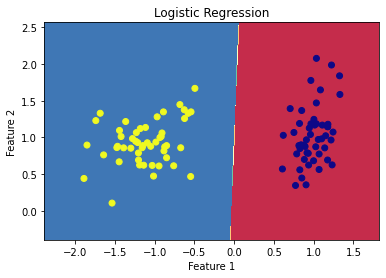

In [21]:
# Define a function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma)

# Plot the decision boundary
plot_decision_boundary(lambda x: log.predict(x))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Logistic Regression");

## **Dealing with the problem of overfitting: Regularization**<a name = 'Regularization'></a>

While underfitting algorithm has high bias, overfitting, on the other hand, has high variance. Underfitting happens when the form of hypothesis function h maps poorly to the trend of the data. It is usually caused by a function that is too simple or uses too few features. At the other extreme, overfitting, or high variance, is caused by a hypothesis function that fits the available data but does not generalize well to predict new data. It is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data.

This terminology is applied to both linear and logistic regression. There are two main options to address the issue of overfitting:

1) Reduce the number of features:<br>
• Manually select which features to keep.<br>
• Use a model selection algorithm.<br>

2) Regularization <br>
• Keep all the features, but reduce the magnitude of parameters $\theta_j$. Regularization works well when there are a lot of slightly useful features. 

The main focus here is to understand intuitions behind how regularization works to reduce the problem of overfitting.

### **Regularized Cost Function**

Consider two hypothesis functions from the same training data.

$\theta_1 X_1$, $\theta_2 X_2$, $\theta_3 X_3$ <- Just right, works perfectly well in both training and testing data

$\theta_1 X_1$, $\theta_2 X_2$, $\theta_3 X_3$, $\theta_4 X_4$,....$\theta_j X_j$  <- suffers from overfitting

The two parameters $θ_3$ and $θ_4$ contribute too much to the curliness of the function causing overfitting. So remedy is to penalize those additional parameters and make them very small, so that they will contribute less, or even don't contribute at all to the function shape. It would basically end up with the first function, which fits well the data. However, there is one hurdle to this. It is nearly impossible to know which parameter contributes more or less to the overfitting issue. So in regularization the cost function is modified to shrink all parameters by some amount.

The regularized version adds an extra term, called regularization term $\lambda$ that shrinks all the parameters:


$
J(\theta) =  \frac {1}{2m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)^2}$ <- The Original Cost function

<br>

$
J_{reg}(\theta) =  \frac {1}{2m}[{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)^2} + \lambda\sum_{i=1} ^{n}\theta_j^2] $ <- Regularized Cost function

By convention the first parameter $θ_0$ is left unprocessed, as the loop in the regularization term starts from 1 (i.e. j=1) and not zero.

The λ, or lambda, is the regularization parameter. It determines how much the costs of our theta parameters are inflated. 
Using the above cost function with the extra summation, the output of hypothesis function can be smoothed out to reduce overfitting. The regularization parameter must be chosen carefully. If lambda is chosen to be too large, it may smooth out the function too much and cause underfitting. When its too large, it will crush all the parameters except the first one, ending up with a hypothesis function like $h_θ(x)=θ_0$ where all other θs are next to zero. Such function becomes a simple horizontal line, suffers from underfitting that doesn't fit well the data.

## **Gradient descent of Regularized Linear Regression**

Regularization can be applied to both linear regression and logistic regression. 

Repeat until convergence:{    
$\theta_0:=\theta_j-\frac {\alpha}{m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)x_0}$

$\theta_j:=\theta_j-\alpha[(\frac {1}{m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)x_j} + \frac {\lambda}{m}\theta_j]$ <- for j∈{1,2...n}

}

Rearranging this, leaving  $θ_0$ untouched as always,

Repeat until convergence:{

$\theta_0:=\theta_j-\frac {\alpha}{m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)x_0}$

$\theta_j:=\theta_j(1-\alpha\frac{\lambda}{m})-\frac {\alpha}{m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)x_j}$

}

The first term in the above equation, $(1 - \alpha\frac{\lambda}{m})$ that multiplies with $θ_j$ will always be less than 1 and it's responsible for its shrinkage. Intuitively it can be seen as reducing the value of $\theta_j$ by some amount on every update. Notice that the second term is now exactly the same as it was before the whole regularization thing.        

## **Gradient descent of Regularized Logistic Regression**
To avoid overfitting logistic regression can also be regularized in a similar way.

$
J(\theta) = -\frac {1}{m}{\sum_{i=1} ^{m}(ylog (h_\theta (x)) + (1-y)log (1- h_\theta (x)))}
$

We can regularize this equation by adding a term to the end:

$
J_{reg}(\theta) =  -\frac {1}{m}[{\sum_{i=1} ^{m}(ylog (h_\theta (x)) + (1-y)log (1- h_\theta (x))}]+ \frac {\lambda}{2m}{\sum_{i=1} ^{n}\theta_j^2} $

The second sum, $\sum_{j=1}^n \theta_j^2 $ means to explicitly exclude the bias term, $\theta_0$. ie.. the θ vector is indexed from 0 to n (holding n+1 values, $\theta_0$ through $\theta_n$), and this sum explicitly skips $\theta_0$, by running from 1 to n, skipping 0. Thus, when computing the equation, we should continuously update the two following equations simultaneously:

Taking the derivative of cost function for gradient descent, 

Repeat until convergence: {  

$\theta_0:=\theta_j-\frac {\alpha}{m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)x_0}$

$\theta_j:=\theta_j-\alpha[\frac {1}{m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)x_j} + \frac {\lambda}{m}\theta_j]$ <- for j∈{1,2...n}

}